In [1]:
import sys
sys.path.append('../centroFlye_repo/scripts')

from collections import defaultdict, Counter

import numpy as np
import heapq
import pysam
import edlib

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from utils.bio import read_bio_seq
from ncrf_parser import NCRF_Report
from distance_based_kmer_recruitment import get_kmer_freqs_from_ncrf_report

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]


In [3]:
reads_ncrf_fn = "../data/reads_ncrf_report.txt"
dxz1_fn = "../data/DXZ1_rc.fasta"
updated_dxz1_fn = "../data/DXZ1_rc_star.fasta"

In [4]:
reads_ncrf_report = NCRF_Report(reads_ncrf_fn)
dxz1_seq = read_bio_seq(dxz1_fn)
updated_dxz1_seq = read_bio_seq(updated_dxz1_fn)

In [5]:
k = 19

def get_kmer_counts_reads(ncrf_report, k=19):
    kmer_counts_reads = defaultdict(int)
    for i, (r_id, record) in enumerate(reads_ncrf_report.records.items()):
        if (i % 100 == 0):
            print(i + 1, len(reads_ncrf_report.records))
        r_al = record.r_al
        r_al = r_al.replace('-', '')
        read_kmers = defaultdict(int)
        for i in range(len(r_al)-k+1):
            kmer = r_al[i:i+k]
            kmer_counts_reads[kmer] += 1
    return kmer_counts_reads

kmer_counts_reads = get_kmer_counts_reads(reads_ncrf_report, k=k)

1 2385
101 2385
201 2385
301 2385
401 2385
501 2385
601 2385
701 2385
801 2385
901 2385
1001 2385
1101 2385
1201 2385
1301 2385
1401 2385
1501 2385
1601 2385
1701 2385
1801 2385
1901 2385
2001 2385
2101 2385
2201 2385
2301 2385


In [6]:
def get_circular_kmers(seq, k=19):
    dseq = seq + seq
    kmers = [dseq[i:i+k] for i in range(len(seq))]
    kmers = set(kmers)
    return kmers

dxz1_kmers = get_circular_kmers(dxz1_seq)
updated_dxz1_kmers = get_circular_kmers(updated_dxz1_seq)

dxz_kmers_counts_reads = np.sort([kmer_counts_reads[kmer] for kmer in dxz1_kmers])[::-1]
updated_dxz_kmers_counts_reads = np.sort([kmer_counts_reads[kmer] for kmer in updated_dxz1_kmers])[::-1]

\# 19-mers from DXZ1 that have counts in reads < 100

In [7]:
sum(dxz_kmers_counts_reads < 100)

234

Comparison of DXZ1 and DXZ1* lengths

In [8]:
len(dxz1_seq), len(updated_dxz1_seq)

(2055, 2054)

Distance b/w DXZ1 and DXZ1*

In [9]:
alignment = edlib.align(dxz1_seq, updated_dxz1_seq, task='path')
alignment

{'alphabetLength': 4,
 'cigar': '35=1I86=1I16=1D99=1X16=1X55=1X159=1X24=1D119=1X207=1X84=1D8=1D1=1I47=1X6=1X28=1D68=1I40=1X127=1X2=1I21=1X207=1I18=1X31=1I15=1X28=1X184=1I154=1D19=1X119=1D9=',
 'editDistance': 30,
 'locations': [(0, 2053)]}

# Figure I1

In [10]:
most_frequent_kmers = heapq.nlargest(n=len(dxz1_kmers)*2, iterable=kmer_counts_reads, key=kmer_counts_reads.get)
most_frequent_kmers_cnts = sorted([kmer_counts_reads[kmer] for kmer in most_frequent_kmers], reverse=True)

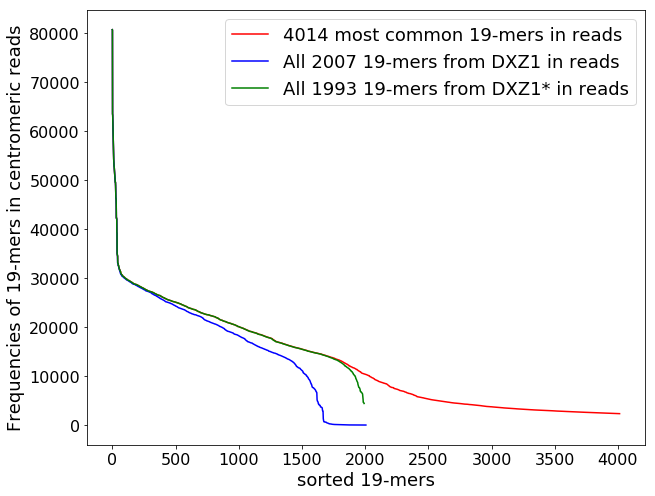

In [11]:
plt.plot(range(len(most_frequent_kmers_cnts)), most_frequent_kmers_cnts, color='red')
plt.plot(range(len(dxz_kmers_counts_reads)), dxz_kmers_counts_reads, color='blue')
plt.plot(range(len(updated_dxz_kmers_counts_reads)), updated_dxz_kmers_counts_reads, color='green')

plt.xlabel(f'sorted {k}-mers', fontsize=18)
plt.ylabel(f'Frequencies of {k}-mers in centromeric reads', fontsize=18)
#plt.title(f'# occurrences of {k}-mers from DXZ1 in centromeric reads', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([f'{2*len(dxz1_kmers)} most common {k}-mers in reads',
            f'All {len(dxz1_kmers)} {k}-mers from DXZ1 in reads',
            f'All {len(updated_dxz1_kmers)} {k}-mers from DXZ1* in reads'],
          fontsize=18)
pass